In [565]:
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [567]:
bike_u = pd.read_csv('bikebuyer.csv')
bike_u

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711,Single,Male,30000,0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555,Married,Female,40000,0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,28907,Married,Male,160000,5,Partial College,Professional,No,3,2.0,Europe,55,No
3,2,Single,Male,160000,0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410,Single,Female,70000,2,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,22820,Married,Male,100000,4,High School,Professional,Yes,3,1.0,Europe,52,No
6993,22821,Married,Female,130000,4,Partial College,Professional,Yes,4,2.0,Europe,52,No
6994,22823,Married,Female,160000,5,Bachelors,Management,Yes,2,1.0,Europe,53,No
6995,22825,Single,Female,120000,5,Partial College,Professional,Yes,3,1.0,Europe,54,No


In [568]:
bike_u.shape

(6997, 13)

In [569]:
bike_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 13 columns):
ID                  6997 non-null int64
Marital Status      6997 non-null object
Gender              6997 non-null object
Yearly Income       6997 non-null int64
Children            6997 non-null int64
Education           6997 non-null object
Occupation          6997 non-null object
Home Owner          6997 non-null object
Cars                6997 non-null int64
Commute Distance    6996 non-null float64
Region              6997 non-null object
Age                 6997 non-null int64
Bike Buyer          6997 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 710.8+ KB


In [570]:
bike_u.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    1
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [571]:
bike_u=bike_u.drop(['ID'],axis=1)

In [572]:
bike_u.shape

(6997, 12)

In [573]:
bike_u.isnull().sum()

Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    1
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [574]:
features = bike_u.iloc[:,:11].values
features

array([['Single', 'Male', 30000, ..., 1.0, 'Europe', 33],
       ['Married', 'Female', 40000, ..., 1.0, 'Europe', 37],
       ['Married', 'Male', 160000, ..., 2.0, 'Europe', 55],
       ...,
       ['Married', 'Female', 160000, ..., 1.0, 'Europe', 53],
       ['Single', 'Female', 120000, ..., 1.0, 'Europe', 54],
       ['Married', 'Male', 130000, ..., 2.0, 'Europe', 54]], dtype=object)

In [575]:
lables =  bike_u.iloc[:,11].values
lables

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [576]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)
imputer.fit(features[:,[8]])
features[:,[8]] = imputer.fit_transform(features[:,[8]])

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [577]:
features

array([['Single', 'Male', 30000, ..., 1.0, 'Europe', 33],
       ['Married', 'Female', 40000, ..., 1.0, 'Europe', 37],
       ['Married', 'Male', 160000, ..., 2.0, 'Europe', 55],
       ...,
       ['Married', 'Female', 160000, ..., 1.0, 'Europe', 53],
       ['Single', 'Female', 120000, ..., 1.0, 'Europe', 54],
       ['Married', 'Male', 130000, ..., 2.0, 'Europe', 54]], dtype=object)

In [578]:
u_bike = pd.DataFrame(features)
u_bike

,0,1,2,3,4,5,6,7,8,9,10
0,Single,Male,30000,0,Partial College,Clerical,No,1,1,Europe,33
1,Married,Female,40000,0,Graduate Degree,Clerical,Yes,0,1,Europe,37
2,Married,Male,160000,5,Partial College,Professional,No,3,2,Europe,55
3,Single,Male,160000,0,Graduate Degree,Management,Yes,2,5,Pacific,47
4,Single,Female,70000,2,Bachelors,Skilled Manual,No,1,1,North America,38
...,...,...,...,...,...,...,...,...,...,...,...
6992,Married,Male,100000,4,High School,Professional,Yes,3,1,Europe,52
6993,Married,Female,130000,4,Partial College,Professional,Yes,4,2,Europe,52
6994,Married,Female,160000,5,Bachelors,Management,Yes,2,1,Europe,53
6995,Single,Female,120000,5,Partial College,Professional,Yes,3,1,Europe,54


In [579]:
u_bike.apply(lambda x: sum(x.isnull()),axis=0)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [580]:
#u_bike = u_bike.drop([0],axis=1)
u_bike

,0,1,2,3,4,5,6,7,8,9,10
0,Single,Male,30000,0,Partial College,Clerical,No,1,1,Europe,33
1,Married,Female,40000,0,Graduate Degree,Clerical,Yes,0,1,Europe,37
2,Married,Male,160000,5,Partial College,Professional,No,3,2,Europe,55
3,Single,Male,160000,0,Graduate Degree,Management,Yes,2,5,Pacific,47
4,Single,Female,70000,2,Bachelors,Skilled Manual,No,1,1,North America,38
...,...,...,...,...,...,...,...,...,...,...,...
6992,Married,Male,100000,4,High School,Professional,Yes,3,1,Europe,52
6993,Married,Female,130000,4,Partial College,Professional,Yes,4,2,Europe,52
6994,Married,Female,160000,5,Bachelors,Management,Yes,2,1,Europe,53
6995,Single,Female,120000,5,Partial College,Professional,Yes,3,1,Europe,54


In [581]:
u_bike[0].value_counts()

Married    4141
Single     2856
Name: 0, dtype: int64

In [582]:
u_bike[0].replace(['Married','Single'],[0,1],inplace=True)

In [583]:
u_bike[1].value_counts()

Male      3545
Female    3452
Name: 1, dtype: int64

In [584]:
u_bike[1].replace(['Male','Female'],[0,1],inplace=True)

In [585]:
u_bike[4].value_counts()

Partial College        1932
Bachelors              1870
High School            1313
Graduate Degree        1272
Partial High School     610
Name: 4, dtype: int64

In [586]:
u_bike[4].replace(['Partial College','Bachelors','High School','Graduate Degree','Partial High School'],[1,2,3,4,5],inplace=True)

In [587]:
u_bike[5].value_counts()

Professional      2031
Skilled Manual    1748
Management        1265
Manual             990
Clerical           963
Name: 5, dtype: int64

In [588]:
u_bike[5].replace(['Professional','Skilled Manual','Management','Manual','Clerical'],[7,8,9,10,11],inplace=True)

In [589]:
u_bike[6].value_counts()

Yes    4979
No     2018
Name: 6, dtype: int64

In [590]:
u_bike[6].replace(['Yes','No'],[5,6],inplace=True)

In [591]:
u_bike[9].value_counts()

North America    3728
Europe           2096
Pacific          1173
Name: 9, dtype: int64

In [592]:
u_bike[9].replace(['North America','Europe','Pacific'],[2,3,4],inplace=True)

In [593]:
#rename columns
u_bike.rename(columns = {0:"Marital Status", 1:"Gender", 2:"Yearly Income", 3:"Children", 4:"Education",
5:"Occupation", 6:"Home Owner", 7:"Cars", 8:"Commute Distance", 9:"Region",
10:"Age"},inplace = True) 


In [594]:
x = u_bike.iloc[:,0:12]
x

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,1,0,30000,0,1,11,6,1,1,3,33
1,0,1,40000,0,4,11,5,0,1,3,37
2,0,0,160000,5,1,7,6,3,2,3,55
3,1,0,160000,0,4,9,5,2,5,4,47
4,1,1,70000,2,2,8,6,1,1,2,38
...,...,...,...,...,...,...,...,...,...,...,...
6992,0,0,100000,4,3,7,5,3,1,3,52
6993,0,1,130000,4,1,7,5,4,2,3,52
6994,0,1,160000,5,2,9,5,2,1,3,53
6995,1,1,120000,5,1,7,5,3,1,3,54


In [595]:
x.shape

(6997, 11)

In [596]:
y=bike_u.iloc[:,11]
y.value_counts()

No     5997
Yes    1000
Name: Bike Buyer, dtype: int64

In [597]:
z= u_bike.loc[:,['Yearly Income', 'Age']].values

In [598]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=0)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)

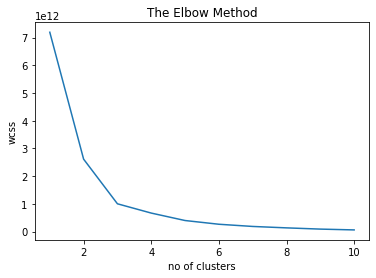

In [599]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [600]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(z)

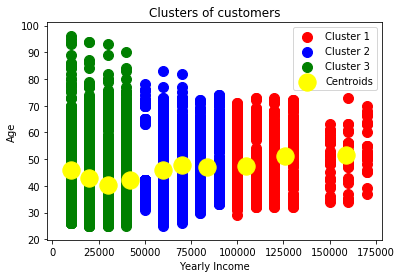

In [629]:
plt.scatter(z[y_kmeans == 0, 0], z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(z[y_kmeans == 1, 0], z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(z[y_kmeans == 2, 0], z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(z[y_kmeans == 3, 0], z[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Yearly Income')
plt.ylabel('Age')
plt.legend()
plt.show()

In [633]:
x.pivot_table(x,index=['Marital Status'])

,Education,Gender,Home Owner,Occupation,Region
Marital Status,,,,,
0,2.514851,0.467037,5.191500,8.434919,2.610722
1,2.568277,0.531513,5.428922,8.806022,2.669818


In [651]:
x.pivot_table(x,index=['Region'])

,Education,Gender,Home Owner,Marital Status,Occupation
Region,,,,,
2,2.581277,0.486052,5.259657,0.366416,8.109174
3,2.513359,0.507156,5.320611,0.509065,9.613550
4,2.436488,0.491901,5.322251,0.360614,8.267690


In [638]:
b = u_bike[['Marital Status','Yearly Income','Children','Education', 'Occupation', 'Home Owner', 'Cars','Commute Distance', 'Region', 'Age']]
a= bike_u[['Bike Buyer']]

In [639]:
b

,Marital Status,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,1,30000,0,1,11,6,1,1,3,33
1,0,40000,0,4,11,5,0,1,3,37
2,0,160000,5,1,7,6,3,2,3,55
3,1,160000,0,4,9,5,2,5,4,47
4,1,70000,2,2,8,6,1,1,2,38
...,...,...,...,...,...,...,...,...,...,...
6992,0,100000,4,3,7,5,3,1,3,52
6993,0,130000,4,1,7,5,4,2,3,52
6994,0,160000,5,2,9,5,2,1,3,53
6995,1,120000,5,1,7,5,3,1,3,54


In [640]:
a

,Bike Buyer
0,Yes
1,Yes
2,No
3,No
4,Yes
...,...
6992,No
6993,No
6994,No
6995,No


In [641]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(b)

In [642]:
x_std

array([[ 1.20413038, -0.84295537, -0.6940581 , ..., -1.09817353,
         0.48489506, -1.01607359],
       [-0.83047485, -0.53109798, -0.6940581 , ..., -1.09817353,
         0.48489506, -0.6803849 ],
       [-0.83047485,  3.21119063,  2.43058772, ..., -0.75654775,
         0.48489506,  0.83021423],
       ...,
       [-0.83047485,  3.21119063,  2.43058772, ..., -1.09817353,
         0.48489506,  0.66236988],
       [ 1.20413038,  1.96376109,  2.43058772, ..., -1.09817353,
         0.48489506,  0.74629205],
       [-0.83047485,  2.27561847,  2.43058772, ..., -0.75654775,
         0.48489506,  0.74629205]])

In [643]:
import numpy as np
features=x_std.T
covariance_matrix=np.cov(features)
print(covariance_matrix)

[[ 1.00014294e+00 -1.59425921e-01 -1.09396961e-01  2.02163960e-02
   1.31247828e-01  2.57622018e-01 -4.99542361e-02  3.02593506e-03
   3.85751696e-02 -2.85594657e-01]
 [-1.59425921e-01  1.00014294e+00  4.74181044e-01 -6.63580538e-02
  -4.80833687e-01 -9.01016549e-02  4.72060084e-01  9.73395494e-03
  -9.42833266e-02  1.95416610e-01]
 [-1.09396961e-01  4.74181044e-01  1.00014294e+00 -9.67745162e-02
  -1.70816555e-01 -1.42014181e-01  4.47669086e-01  2.61439957e-02
   1.57480631e-01 -8.02684301e-04]
 [ 2.02163960e-02 -6.63580538e-02 -9.67745162e-02  1.00014294e+00
   9.57974157e-02  2.25939099e-02 -1.98167834e-02  3.68929269e-03
  -4.14723898e-02  8.35663439e-03]
 [ 1.31247828e-01 -4.80833687e-01 -1.70816555e-01  9.57974157e-02
   1.00014294e+00  4.44160815e-02 -1.87685106e-01  3.49012687e-03
   1.91903952e-01 -6.00158227e-03]
 [ 2.57622018e-01 -9.01016549e-02 -1.42014181e-01  2.25939099e-02
   4.44160815e-02  1.00014294e+00  4.91956846e-02  5.95546375e-03
   6.15430471e-02 -1.48035275e-01

In [644]:
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)

In [645]:
print('\nEigen values \n%s' %eig_vals)


Eigen values 
[2.28044797 1.4222332  0.35523542 0.47607604 0.60978484 0.7307623
 1.20108822 0.89905436 1.02481872 1.00192832]


In [646]:
eig_vals[0]/sum(eig_vals)

0.2280122048425715

In [647]:
projected_x=x_std.dot(eig_vecs.T[0])
projected_x

array([ 2.32503162,  1.85529776, -4.10761337, ..., -3.41395666,
       -3.25031432, -3.76747306])

In [648]:
result=pd.DataFrame(projected_x,columns=['PC1'])   # PC1=Principal Component 1
result['y-axis']=0.0
result['label']=a
result

,PC1,y-axis,label
0,2.325032,0.0,Yes
1,1.855298,0.0,Yes
2,-4.107613,0.0,No
3,-1.224498,0.0,No
4,0.226780,0.0,Yes
...,...,...,...
6992,-2.922336,0.0,No
6993,-3.995451,0.0,No
6994,-3.413957,0.0,No
6995,-3.250314,0.0,No


In [649]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA result')

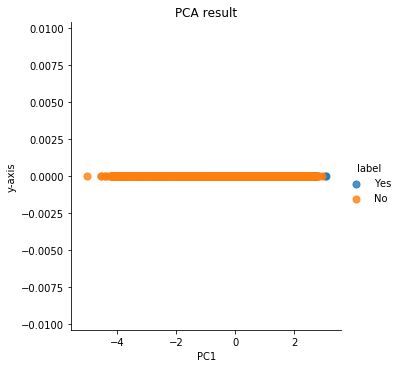

In [650]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')
plt.title('PCA result')